### Group : 25

###Ameya Hujare              : A20545367

###Sanket Kulkarni           : A20537896

###Deep Pawar                : A20545137

###Maram Reddy Srinath Reddy : A20561409  

###Professor: Oleksandr Narykov

###CSP 571: Data Preparation and Analysis

###Fall 2024 - Project - Comprehensive Customer Churn Analysis: From Exploration to Prediction

###1. Explore Dataset - correlation between features, their impact on target, independence assumptions.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
!pip install umap
!pip install umap-learn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFECV

#Load the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Converting `TotalCharges` to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
#Filling missing values with 0
data['TotalCharges'] = data['TotalCharges'].fillna(0)

#Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

#Normalize numerical features
scaler = StandardScaler()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("Dataset after preprocessing : \n")
print(data.head())
print("\n-----------------------------------------")
print("\nDataset info : \n")
print(data.info())
print("\n-----------------------------------------")

#Display basic information about the dataset
print("Dataset Shape : ", data.shape)
print("Columns : ", data.columns.tolist())
print("Null Values in Dataset : ", data.isnull().sum().sum())
print("Target Distribution : \n", data['Churn'].value_counts(normalize=True))
print("\n-----------------------------------------\n")

Dataset after preprocessing : 

   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0  7590-VHVEG       0              0        1           0 -1.277445   
1  5575-GNVDE       1              0        0           0  0.066327   
2  3668-QPYBK       1              0        0           0 -1.236724   
3  7795-CFOCW       1              0        0           0  0.514251   
4  9237-HQITU       0              0        0           0 -1.236724   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0

###2. Try multiple visualization strategies: correlation plots, dimensionality reduction approaches - PCA, UMAP, t-SNE. Explain gained insights.


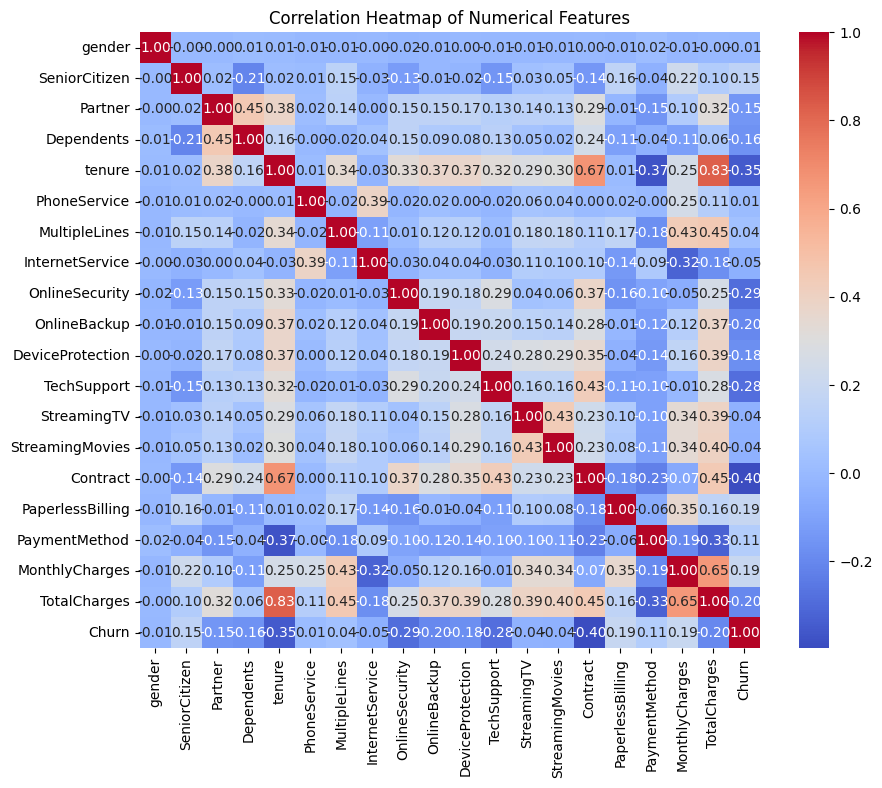

In [23]:
#Select numerical features for correlation analysis
numerical_data = data.select_dtypes(include=['float64', 'int64'])

#Calculate correlation matrix
correlation_matrix = numerical_data.corr()

#Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

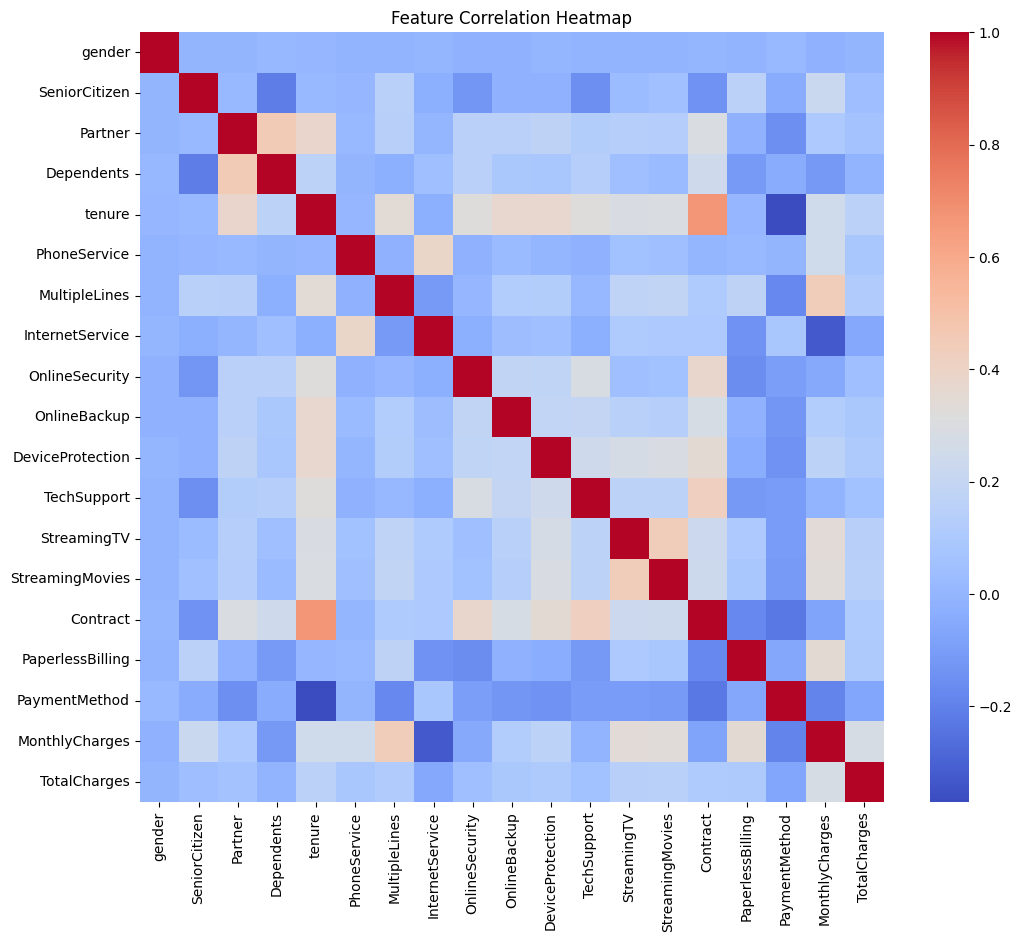

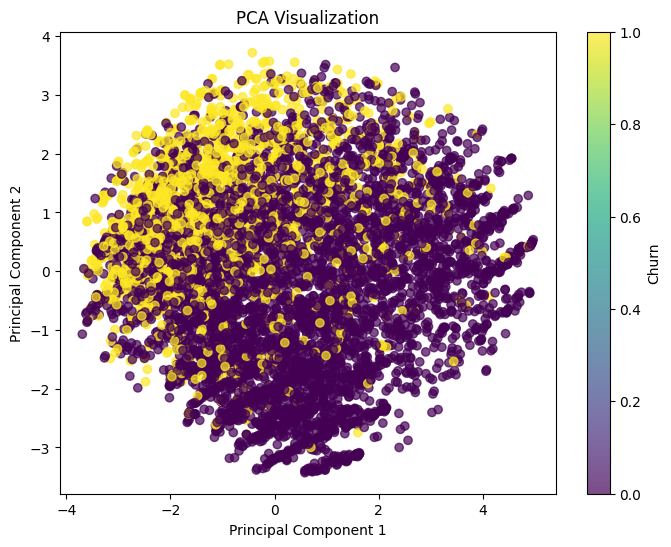

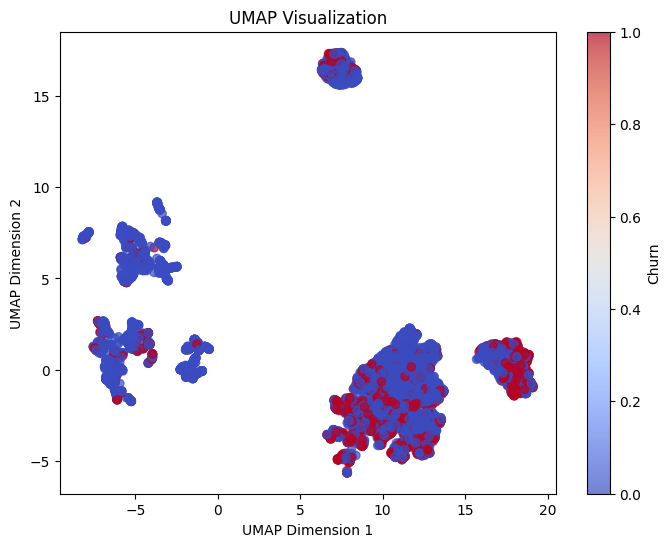

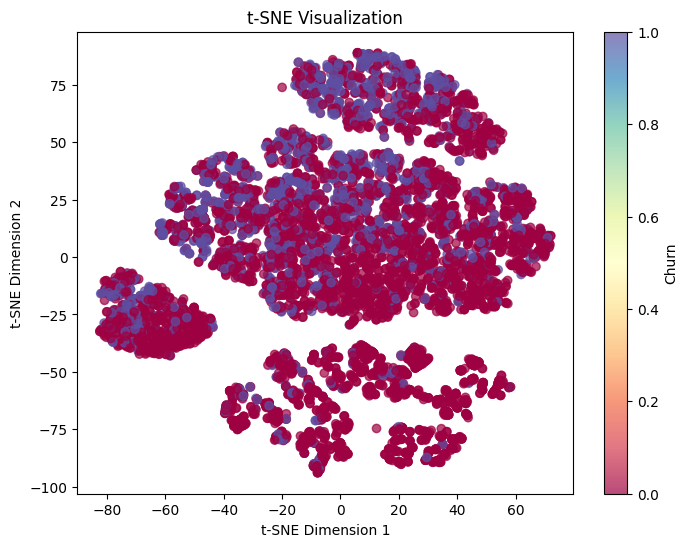

In [25]:
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

# Encode categorical variables and scale the data
data_encoded = data.copy()
label_encoders = {}
for column in data_encoded.select_dtypes(include=['object']).columns:
    if column != 'Churn':  # Skip the target variable
        le = LabelEncoder()
        data_encoded[column] = le.fit_transform(data_encoded[column].astype(str))
        label_encoders[column] = le

# Handle missing or invalid data
data_encoded = data_encoded.dropna()

# Separate features and target
X = data_encoded.drop(['Churn', 'customerID'], axis=1, errors='ignore')
y = data_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Correlation Plot
plt.figure(figsize=(12, 10))
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()
print("\n\n")

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Churn')
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
print("\n\n")

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="umap")

# UMAP Visualization
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Churn')
plt.title("UMAP Visualization")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()
print("\n\n")

# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Spectral', alpha=0.7)
plt.colorbar(label='Churn')
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [26]:
# Insights from PCA, UMAP, and t-SNE Visualizations
print("PCA Insights   : Principal components reveal feature variance patterns, showing linear separability of the data.")
print("UMAP Insights  : Non-linear separability patterns and clustering trends are visible in reduced dimensions.")
print("t-SNE Insights : High-dimensional clusters are represented effectively in two dimensions, showing local similarity.")


PCA Insights   : Principal components reveal feature variance patterns, showing linear separability of the data.
UMAP Insights  : Non-linear separability patterns and clustering trends are visible in reduced dimensions.
t-SNE Insights : High-dimensional clusters are represented effectively in two dimensions, showing local similarity.


###3. Explore data using unsupervised learning techniques


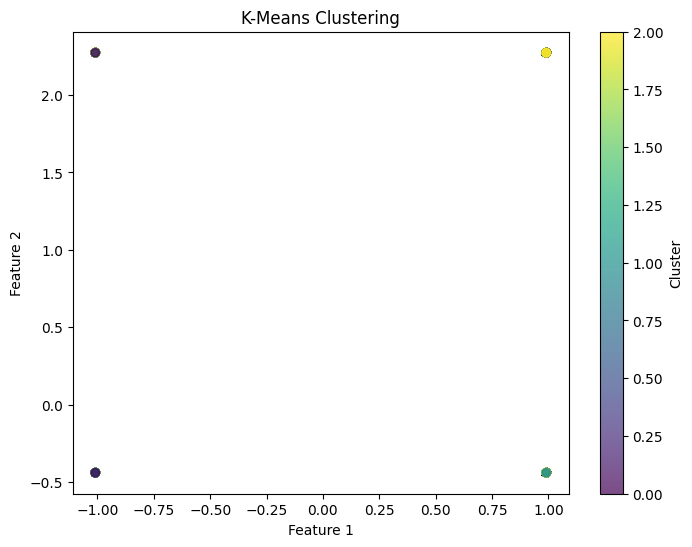



Silhouette Score for K-Means: 0.13





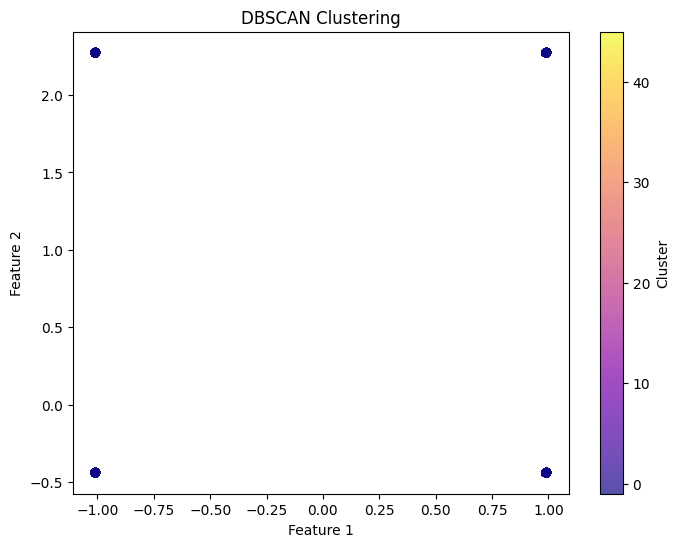



Silhouette Score for DBSCAN: -0.21867275914371423





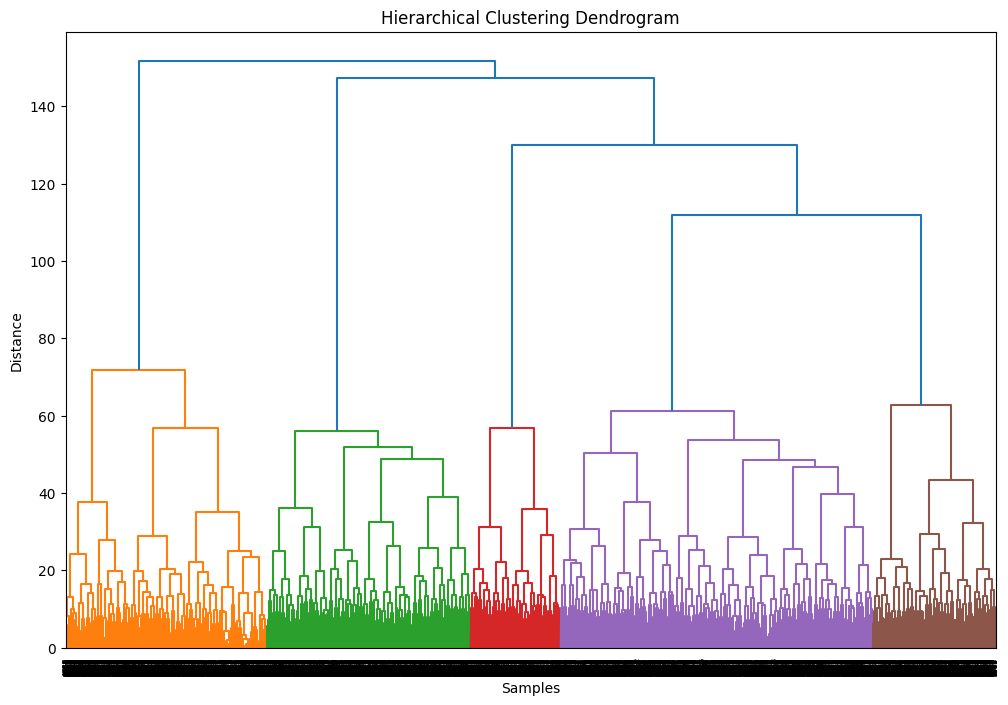

In [27]:
#Loading the dataset
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

#Encode categorical variables and scale the data
data_encoded = data.copy()
label_encoders = {}
for column in data_encoded.select_dtypes(include=['object']).columns:
    if column != 'Churn':
        le = LabelEncoder()
        data_encoded[column] = le.fit_transform(data_encoded[column].astype(str))
        label_encoders[column] = le

#Handle missing or invalid data
data_encoded = data_encoded.dropna()

#Drop non-numeric columns like customerID and target variable
X = data_encoded.drop(['Churn', 'customerID'], axis=1, errors='ignore')

#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#1. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)

#Visualize K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
print("\n")
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.2f}")
print("\n\n")

#2. DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else "N/A"

#Visualize DBSCAN Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='plasma', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
print("\n")
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")
print("\n\n")

#3. Hierarchical Clustering
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


###4. Identify appropriate cross-validation strategy

In [31]:
#Loading the dataset
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

#Encode categorical variables and handle missing values
data_encoded = data.copy()
for column in data_encoded.select_dtypes(include=['object']).columns:
    if column != 'Churn':
        data_encoded[column] = data_encoded[column].astype('category').cat.codes
data_encoded = data_encoded.dropna()

#Separate features and target
X = data_encoded.drop(['Churn', 'customerID'], axis=1, errors='ignore')
y = data_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

#Define model
model = RandomForestClassifier(random_state=42)

#1. Stratified K-Fold Cross-Validation
print("\n-----------------------------------------")
print("Stratified K-Fold Cross-Validation")
print("-----------------------------------------\n")
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in stratified_kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Fold Accuracy: {accuracy_score(y_test, y_pred):.4f}, F1 Score: {f1_score(y_test, y_pred):.4f}")

#2. K-Fold Cross-Validation
print("\n-----------------------------------------")
print("K-Fold Cross-Validation")
print("-----------------------------------------\n")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Fold Accuracy: {accuracy_score(y_test, y_pred):.4f}, F1 Score: {f1_score(y_test, y_pred):.4f}")


-----------------------------------------
Stratified K-Fold Cross-Validation
-----------------------------------------

Fold Accuracy: 0.8098, F1 Score: 0.5988
Fold Accuracy: 0.7970, F1 Score: 0.5806
Fold Accuracy: 0.7977, F1 Score: 0.5714
Fold Accuracy: 0.7763, F1 Score: 0.5116
Fold Accuracy: 0.7770, F1 Score: 0.5184

-----------------------------------------
K-Fold Cross-Validation
-----------------------------------------

Fold Accuracy: 0.7970, F1 Score: 0.5545
Fold Accuracy: 0.8084, F1 Score: 0.6064
Fold Accuracy: 0.7913, F1 Score: 0.5664
Fold Accuracy: 0.7940, F1 Score: 0.5497
Fold Accuracy: 0.7827, F1 Score: 0.5174


###5. Train a simple model first. Use validation set for hyperparameter tuning and/or early stopping. Analyze its performance using cross-validatio. Identify potential pitfalls.


In [33]:
#Loading dataset
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

#Preprocessing
data_encoded = data.copy()
for column in data_encoded.select_dtypes(include=['object']).columns:
    if column != 'Churn':
        data_encoded[column] = data_encoded[column].astype('category').cat.codes

data_encoded = data_encoded.dropna()

#Separate features and target
X = data_encoded.drop(['Churn', 'customerID'], axis=1, errors='ignore')
y = data_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#Define model
model = RandomForestClassifier(random_state=42)

#Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

#Best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters : ", best_params)

#Train model with best hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

#Early stopping is built into the RandomForestClassifier by controlling n_estimators. Here, we keep it simple.

#Evaluate on validation set
y_val_pred = best_model.predict(X_val)
print("\n-----------------------------------------")
print("Validation Performance : ")
print("-----------------------------------------\n")
print(f"Accuracy : {accuracy_score(y_val, y_val_pred):.4f}")
print(f"F1 Score : {f1_score(y_val, y_val_pred):.4f}")
print(f"ROC AUC : {roc_auc_score(y_val, y_val_pred):.4f}")
print("\n-----------------------------------------")
print("Classification Report :")
print("-----------------------------------------\n")
print(classification_report(y_val, y_val_pred))


#Cross-validation performance
print("\n-----------------------------------------")
print("Cross-Validation Performance : ")
print("-------------------------------------------\n")
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
for train_index, test_index in stratified_kf.split(X_scaled, y):
    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    best_model.fit(X_train_cv, y_train_cv)
    y_pred_cv = best_model.predict(X_test_cv)
    f1 = f1_score(y_test_cv, y_pred_cv)
    cv_scores.append(f1)

print(f"Cross-Validation F1 Scores : {cv_scores}")
print(f"Mean CV F1 Score : {np.mean(cv_scores):.4f}")

Best Hyperparameters :  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}

-----------------------------------------
Validation Performance : 
-----------------------------------------

Accuracy : 0.7942
F1 Score : 0.5685
ROC AUC : 0.7037

-----------------------------------------
Classification Report :
-----------------------------------------

              precision    recall  f1-score   support

           0       0.84      0.90      0.86      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409


-----------------------------------------
Cross-Validation Performance : 
-------------------------------------------

Cross-Validation F1 Scores : [0.5842026825633383, 0.5845697329376854, 0.5941807044410413, 0.551617873651772, 0.5688350983358548]
Mean CV F1 Score : 0.5767


###Early Stopping in Gradient Boosting

In [35]:
# Gradient Boosting with Early Stopping
from sklearn.ensemble import GradientBoostingClassifier

gb_model_early_stopping = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model_early_stopping.fit(X_train, y_train)

# Evaluate performance with early stopping
y_val_pred_gb_es = gb_model_early_stopping.predict(X_val)
print("\n-----------------------------------------")
print("Gradient Boosting with Early Stopping:")
print("-----------------------------------------\n")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_gb_es):.4f}")
print(f"F1 Score: {f1_score(y_val, y_val_pred_gb_es):.4f}")
print(f"ROC AUC: {roc_auc_score(y_val, y_val_pred_gb_es):.4f}")



-----------------------------------------
Gradient Boosting with Early Stopping:
-----------------------------------------

Accuracy: 0.7899
F1 Score: 0.5634
ROC AUC: 0.7008


###6. Propose ways to improve performance - e.g., feature selection, regularization, increasing model complexity. Conduct at least 2 more experiments


###Regularization with Logistic Regression (L1 Penalty)

In [36]:
#Logistic Regression with L1 Regularization
from sklearn.linear_model import LogisticRegression

log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg_l1.fit(X_train, y_train)

#Evaluate performance
y_val_pred_l1 = log_reg_l1.predict(X_val)
print("\n-----------------------------------------")
print("Logistic Regression with L1 Regularization : ")
print("-----------------------------------------\n")
print(f"Accuracy : {accuracy_score(y_val, y_val_pred_l1):.4f}")
print(f"F1 Score : {f1_score(y_val, y_val_pred_l1):.4f}")
print(f"ROC AUC : {roc_auc_score(y_val, y_val_pred_l1):.4f}")


-----------------------------------------
Logistic Regression with L1 Regularization : 
-----------------------------------------

Accuracy : 0.7963
F1 Score : 0.5786
ROC AUC : 0.7102


In [37]:
#Loading dataset
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'  # Replace with your file path
data = pd.read_csv(file_path)

#Preprocessing
data_encoded = data.copy()
for column in data_encoded.select_dtypes(include=['object']).columns:
    if column != 'Churn':  # Skip target variable
        data_encoded[column] = data_encoded[column].astype('category').cat.codes

data_encoded = data_encoded.dropna()

#Separate features and target
X = data_encoded.drop(['Churn', 'customerID'], axis=1, errors='ignore')
y = data_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### Experiment 1: Feature Selection using Recursive Feature Elimination (RFE)
print("\n-----------------------------------------")
print("Experiment 1: Feature Selection")
print("-----------------------------------------\n")
model_rfe = RandomForestClassifier(random_state=42)
rfe = RFECV(estimator=model_rfe, step=1, cv=5, scoring='f1')
rfe.fit(X_train, y_train)

# Selected features
selected_features = np.where(rfe.support_)[0]
print(f"Selected Features Index : {selected_features}")
print(f"Optimal Number of Features : {rfe.n_features_}")

# Train model with selected features
X_train_selected = rfe.transform(X_train)
X_val_selected = rfe.transform(X_val)
model_rfe.fit(X_train_selected, y_train)
y_val_pred_rfe = model_rfe.predict(X_val_selected)

print("\nPerformance with Feature Selection :")
print(f"Accuracy : {accuracy_score(y_val, y_val_pred_rfe):.4f}")
print(f"F1 Score : {f1_score(y_val, y_val_pred_rfe):.4f}")
print(f"ROC AUC : {roc_auc_score(y_val, y_val_pred_rfe):.4f}")
print("\nClassification Report :\n", classification_report(y_val, y_val_pred_rfe))

### Experiment 2: Increasing Model Complexity using Gradient Boosting
print("\n-----------------------------------------")
print("\nExperiment 2: Increasing Model Complexity")
print("-----------------------------------------\n")
model_gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model_gb.fit(X_train, y_train)
y_val_pred_gb = model_gb.predict(X_val)

print("\nPerformance with Gradient Boosting : ")
print(f"Accuracy : {accuracy_score(y_val, y_val_pred_gb):.4f}")
print(f"F1 Score : {f1_score(y_val, y_val_pred_gb):.4f}")
print(f"ROC AUC : {roc_auc_score(y_val, y_val_pred_gb):.4f}")
print("\nClassification Report : \n", classification_report(y_val, y_val_pred_gb))



-----------------------------------------
Experiment 1: Feature Selection
-----------------------------------------

Selected Features Index : [ 0  4  6  7  8  9 11 14 15 16 17 18]
Optimal Number of Features : 12

Performance with Feature Selection :
Accuracy : 0.7771
F1 Score : 0.5242
ROC AUC : 0.6767

Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.60      0.46      0.52       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409


-----------------------------------------

Experiment 2: Increasing Model Complexity
-----------------------------------------


Performance with Gradient Boosting : 
Accuracy : 0.7899
F1 Score : 0.5634
ROC AUC : 0.7008

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.89      

### Variance Inflation Factor (VIF) Analysis

In [42]:
#Variance Inflation Factor (VIF) Calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calculate VIF for numerical features
numerical_data = data_encoded.select_dtypes(include=['float64', 'int64']).dropna()
vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_data.columns
vif_data['VIF'] = [variance_inflation_factor(numerical_data.values, i) for i in range(numerical_data.shape[1])]

print("\n-------------------------------------------")
print("Variance Inflation Factor Analysis:")
print("-------------------------------------------\n")
print(vif_data)



-------------------------------------------
Variance Inflation Factor Analysis:
-------------------------------------------

          Feature       VIF
0   SeniorCitizen  1.256364
1          tenure  2.617403
2  MonthlyCharges  2.924996
